# title: "Predicting the survival rate of a victim involved in a car accident"
author: "Anurag Jha"
date: "April 30th, 2020"

Aim- To create a predictive model for a possible survival of a victim involved in an accident by minimizing false negatives and false positive values in the model. The column "death", we are predicting is a binary value with "1" as "dead" and "0" as "alive".

In [1]:
start_time <- Sys.time()

options(warn=-1, msg=-1)

#Loading required packages
library(mice)
library(tidyverse)
library(ggplot2)
library(caret)  # confusionMatrix function
library(caretEnsemble)
library(MASS)  # lda function
library(class) # kNN
library(psych)
library(Amelia)
library(mice)
library(GGally)
library(rpart)
library(randomForest)
library(gbm)
#reading the csv file
dataset<- read.csv("C:/Users/anuragsuperman/Desktop/HW AR/prj/nassCDS.csv")


Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift


Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.

Introduction to the Data-
The data is from police-reported car accidents which was associated with damage to property or harm to people with at least one car towed in the event from the year range of 1997-2002. The data is for the front seat occupants only. The package name of this data is “nassCDS”.  The platform to analyze the data is R Studio.
Data Description-
The data frame has 26217 observations and has 16 variables. These variables are described as follows:
1.	“dvcat”- This variable has 5 factors of estimated collision impact speeds. These factors are range of speed in unit kilometers per hour (km/h). The various estimated impact speed ranges are 1-9km/h, 10-24km/h, 25-39km/h, 40-54km/h, 55km/h and above.

2.	“weight”- Column weight was designed to account the sampling probabilities. The range of weight in this data is 0 to 57871.595. This column is numeric and has no unit.

3.	“dead”- This column has only two factors, “dead” and “alive”. This is the response variable for the prediction model. This dependent variable shows if the accident victim was dead or alive.

4.	“airbag”- This independent variable has two factors, “airbag” and “none”. The variable shows if the vehicle was equipped with airbag or not.

5.	“seatbelt”- This variable has two factors, “belted” and “none”. The variable shows that the accident victims were using seatbelt or not.

6.	“frontal”- This variable has two factors, “1” and “0”. The variable “1” shows that the collision was frontal, and the factor “0” shows that the accident was non frontal.

7.	“sex”- This variable shows that the person involved in the accident was male (m)  or female (f).

8.	“ageOFocc”- Ranging from 16 to 97, this factor is numeric and denotes the age of person involved in the accident.

9.	“yearacc”- This numeric column has a range from 1997 to 2002 showing the year in which the accident happened.

10.	“yarVeh”- This numeric variable shows the year of make for the car involved in the accident. The numeric column has range 1953 to 2003. (Even though the most recent accidents occurred in 2002, the most recent year of make for the car involved in the accident is 2003.)

11.	“abcat”- This column has three levels of “nodeploy”, “unavail”, and “deploy”. This factor shows if the airbag in the car got deployed, not deployed, or the information is unavailable.

12.	“occRole”- This variable has two factors of “pass” and “driver”. The variable denotes that the accident victim was a driver or a passenger.

13.	“deploy”- This variable has two factors, “1” for one or more airbags getting deployed in the car involved in the accident and “0” for airbag not deployed or was not available in the car.

14.	“injSeverity”- This column has 7 factors ranging from “0” to “7”. “0” for no injury, “1” for possible injury, “2” for no incapability due to injury, “3” for incapability due to injury, “4” for killed in the accident, “5” as unknown, and “6” for prior death.

15.	“caseid”- This column has a unique ID number made by combining the population sampling unit, case number, and the vehicle number. 

For a better analysis of the data, the factors were modified as follows:
“dvcat” were changed from "1-9km/h", “10-24", "25-39", "40-54", and "55+", to “0”, “1”, “2”, “3”, and “4” respectively.
“dead” was changed from “dead” and “alive”, to “1” and “0” respectively.
“airbag” was changed from “none” and “airbag” to “0” and “1” respectively.
“seatbelt” was changed from “belted” and “none” to “1” and “0” respectively.
“sex” was changed from “m” and “f” to “1” and “0” respectively.
“abcat” was changed from “unavail”, “nodeploy”, and “deploy” to “2”, “0”, and “1” respectively.
“occRole” was changed from “driver” and “pass” to “1” and “0” respectively.

In [2]:
#Changing the category to numbers
levels(dataset$dvcat)[levels(dataset$dvcat) == "55+"] <- "4"
levels(dataset$dvcat)[levels(dataset$dvcat) == "40-54"] <- "3"
levels(dataset$dvcat)[levels(dataset$dvcat) == "25-39"] <- "2"
levels(dataset$dvcat)[levels(dataset$dvcat) == "10-24"] <- "1"
levels(dataset$dvcat)[levels(dataset$dvcat) == "1-9km/h"] <- "0"

levels(dataset$dead)[levels(dataset$dead) == "dead"] <- "1"
levels(dataset$dead)[levels(dataset$dead) == "alive"] <- "0"

levels(dataset$airbag)[levels(dataset$airbag) == "none"] <- "0"
levels(dataset$airbag)[levels(dataset$airbag) == "airbag"] <- "1"

levels(dataset$seatbelt)[levels(dataset$seatbelt) == "belted"] <- "1"
levels(dataset$seatbelt)[levels(dataset$seatbelt) == "none"] <- "0"

levels(dataset$sex)[levels(dataset$sex) == "m"] <- "1"
levels(dataset$sex)[levels(dataset$sex) == "f"] <- "0"

levels(dataset$abcat)[levels(dataset$abcat) == "unavail"] <- "2"
levels(dataset$abcat)[levels(dataset$abcat) == "nodeploy"] <- "0"
levels(dataset$abcat)[levels(dataset$abcat) == "deploy"] <- "1"

levels(dataset$occRole)[levels(dataset$occRole) == "driver"] <- "1"
levels(dataset$occRole)[levels(dataset$occRole) == "pass"] <- "0"

The columns, “x” and “caseid” were dropped as they were serial numbers and unique case ID numbers respectively. 

In [3]:
#dropping x and case id column
drops <- c("X", "caseid")
dataset<- dataset[ , !(names(dataset) %in% drops)]

The data was scanned for any missing values and the results showed missing data in the column “injSeverity” 

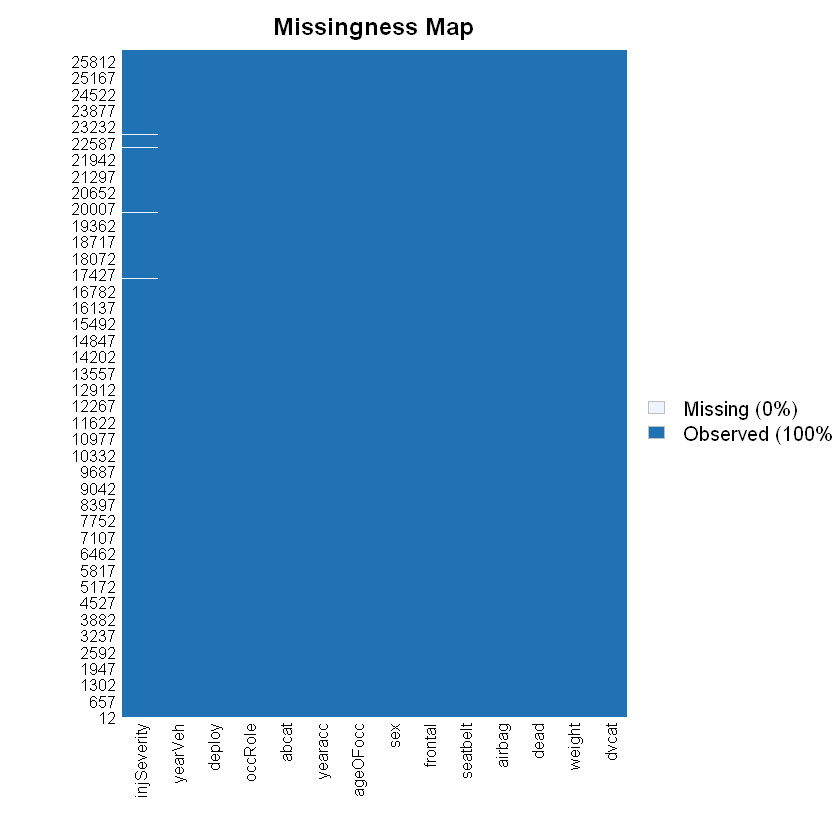

In [4]:
# Checking missing values
missmap(dataset)

The rows containing missing values were checked and removed.

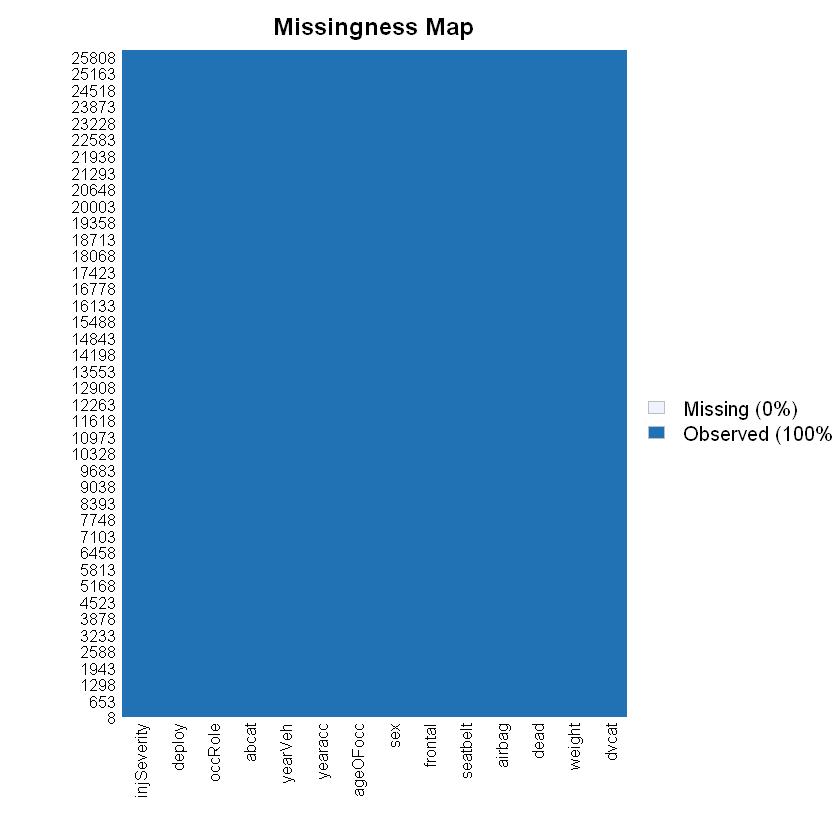

In [5]:
#removing missing values
library(IDPmisc)
dataset<-NaRV.omit(dataset)
missmap(dataset)

After the removal of the rows that had missing values, the size of the data was 26063 observations and 14 columns.

In [6]:
attach(dataset)

Prediction models-
Logistic Regression
The first model used to predict the variable “dead” using all the other independent variables is “Logistic Regression”.
The independent variables used in the Logistic Regression model, “equation_new” are “dvcat”, “weight”, “seatbelt”, “sex”, “ageOFocc”, “yearacc”, “yearVeh”, “abcat”, “occRole”, “deploy”, “injSeverity”, “frontal”, and “airbag”.

In [7]:
equation_new <- glm(dead~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, family = binomial(link=logit), data = dataset)
summary(equation_new)


Call:
glm(formula = dead ~ dvcat + weight + seatbelt + sex + ageOFocc + 
    yearacc + yearVeh + abcat + occRole + deploy + injSeverity + 
    frontal + airbag, family = binomial(link = logit), data = dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3949  -0.0873  -0.0015  -0.0001   7.4633  

Coefficients: (2 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.058e+01  6.499e+01  -0.471  0.63799    
dvcat1       3.596e+00  8.649e-01   4.158 3.21e-05 ***
dvcat2       4.891e+00  8.619e-01   5.674 1.39e-08 ***
dvcat3       5.658e+00  8.626e-01   6.560 5.39e-11 ***
dvcat4       6.424e+00  8.639e-01   7.436 1.04e-13 ***
weight      -7.313e-03  5.919e-04 -12.355  < 2e-16 ***
seatbelt0    7.357e-01  1.125e-01   6.541 6.12e-11 ***
sex1         3.260e-01  1.131e-01   2.882  0.00395 ** 
ageOFocc     2.833e-02  2.805e-03  10.102  < 2e-16 ***
yearacc      2.448e-03  3.235e-02   0.076  0.93967    
yearVeh      1

The summary shows large p-value for “yearacc”, “yearVeh”, “abcat”, “deploy”, and “airbag”. To check and perform the best subset selection, Akaike's Information Criteria (AIC) and Bayesian Information Criteria (BIC) were calculated for the model. 

In [8]:
#best subset selection
n<- nrow(dataset)
q<- 13#number of predictors
AICandBIC<- extractAIC(equation_new, k=c(2,log(n)))
names(AICandBIC)<- c("params","AIC", "BIC")
AICandBIC

params      AIC      BIC 
  16.000 2725.193 2855.885

The AIC is 2725.193 and BIC is 2855.885 for the model. The stepwise selection in both direction was performed to drop unnecessary variables in the model. The new model according to the stepwise selection dropped “yearacc”, “yearVeh”, “abcat”, “deploy”, and “airbag”. 

In [9]:
step(equation_new,direction = "both")

Start:  AIC=2725.19
dead ~ dvcat + weight + seatbelt + sex + ageOFocc + yearacc + 
    yearVeh + abcat + occRole + deploy + injSeverity + frontal + 
    airbag


Step:  AIC=2725.19
dead ~ dvcat + weight + seatbelt + sex + ageOFocc + yearacc + 
    yearVeh + abcat + occRole + deploy + injSeverity + frontal


Step:  AIC=2725.19
dead ~ dvcat + weight + seatbelt + sex + ageOFocc + yearacc + 
    yearVeh + abcat + occRole + injSeverity + frontal

              Df Deviance    AIC
- yearacc      1   2693.2 2723.2
- yearVeh      1   2693.2 2723.2
- abcat        2   2696.3 2724.3
<none>             2693.2 2725.2
- occRole      1   2700.5 2730.5
- sex          1   2701.6 2731.6
- seatbelt     1   2736.7 2766.7
- frontal      1   2766.8 2796.8
- ageOFocc     1   2796.7 2826.7
- weight       1   2929.5 2959.5
- dvcat        4   3017.4 3041.4
- injSeverity  1   6689.1 6719.1

Step:  AIC=2723.2
dead ~ dvcat + weight + seatbelt + sex + ageOFocc + yearVeh + 
    abcat + occRole + injSeverity + frontal


Call:  glm(formula = dead ~ dvcat + weight + seatbelt + sex + ageOFocc + 
    occRole + injSeverity + frontal, family = binomial(link = logit), 
    data = dataset)

Coefficients:
(Intercept)       dvcat1       dvcat2       dvcat3       dvcat4       weight  
 -23.394561     3.625267     4.960817     5.735267     6.501236    -0.007293  
  seatbelt0         sex1     ageOFocc     occRole0  injSeverity      frontal  
   0.745627     0.334123     0.028310     0.358138     4.552890    -0.929560  

Degrees of Freedom: 26062 Total (i.e. Null);  26051 Residual
Null Deviance:	    9610 
Residual Deviance: 2697 	AIC: 2721

The new model “equation_both” was as follows:

In [10]:
equation_both<- glm(dead ~ dvcat + weight + seatbelt + sex + ageOFocc +occRole + injSeverity + frontal, family = binomial(link = logit), data = dataset)
summary(equation_both)


Call:
glm(formula = dead ~ dvcat + weight + seatbelt + sex + ageOFocc + 
    occRole + injSeverity + frontal, family = binomial(link = logit), 
    data = dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3985  -0.0868  -0.0015  -0.0001   7.4582  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.339e+01  1.005e+00 -23.268  < 2e-16 ***
dvcat1       3.625e+00  8.551e-01   4.240 2.24e-05 ***
dvcat2       4.961e+00  8.517e-01   5.824 5.73e-09 ***
dvcat3       5.735e+00  8.523e-01   6.729 1.71e-11 ***
dvcat4       6.501e+00  8.539e-01   7.613 2.67e-14 ***
weight      -7.293e-03  5.921e-04 -12.316  < 2e-16 ***
seatbelt0    7.456e-01  1.114e-01   6.695 2.16e-11 ***
sex1         3.341e-01  1.127e-01   2.964  0.00304 ** 
ageOFocc     2.831e-02  2.795e-03  10.130  < 2e-16 ***
occRole0     3.581e-01  1.292e-01   2.771  0.00558 ** 
injSeverity  4.553e+00  1.076e-01  42.325  < 2e-16 ***
frontal     -9.296e-01  1.104e-01  -8.419  < 2

The summary shows the coefficients of the variable in the column “Estimate” of the summary. The Standard error of each variable is in the column “Std. Error” and the ratio of “Estimate” and “Std. Error” gives us the Z-Value right next to it. The P values in the “Pr(>|z|)” column shows that the data has significant impact of the independent variables chosen from the stepwise selection procedure.

The confusion matrix for the model “equation_both” is obtained as shown below:

In [11]:
dead_probs<- predict(equation_both, type= "response")
dead_preds <- 1*(dead_probs >0.5)
pred_table<- table(dead, dead_preds)
pred_table

    dead_preds
dead     0     1
   0 24756   127
   1   193   987

In [12]:
(recall_eq<- 24756/(24756+193))
(precision_eq<- 24756/(24756+127))
(Accuracy_eq<-  (24756+987)/(24756+987+127+193))

[1] 0.9922642

[1] 0.9948961

[1] 0.9877221

The True Positive (TP) value 24756 shows that 24756 correct alive people were classified/predicted as alive. The True Negative (TN) value 987 shows that 987 people were predicted dead and were dead when compared to the dependent variable column. The False Positive (FP) value 127 and False Negative (FN) value 193 shows the misclassification of the model by predicting dead people alive and alive people dead in the prediction. The “recall” is calculated 0.992 which shows that out of all the positive classes that were predicted (classifying alive), 99.2% (TP/(TP+FN)) were predicted correctly as alive and the rest were dead but were predicted alive. The “precision” is calculated 0.995 which denotes the model predicted 99.5% (TP/(TP+FP)) of the total alive people. The Accuracy of the model ((TP+TN)/Total) is 98.8%.

__________Random Forest____________
The second model used to predict the dependant variable “dead”, is Random Forest. The model “random_eq1” has all the independent variables as predicting values which are “equation_new” are “dvcat”, “weight”, “seatbelt”, “sex”, “ageOFocc”, “yearacc”, “yearVeh”, “abcat”, “occRole”, “deploy”, “injSeverity”, “frontal”, and “airbag”. The model is coded as below:

In [13]:
library(bestglm)
library(randomForest)
library(leaps)
set.seed(1600)
random_eq1 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=13,importance=TRUE,data=dataset)
random_eq1

Loading required package: leaps



Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = 13,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 13

        OOB estimate of  error rate: 0.53%
Confusion matrix:
      0    1 class.error
0 24842   41 0.001647711
1    96 1084 0.081355932

variable importance chart shows the importance of the accuracy in order

The number of trees and “mtry” values are an important part of the model Random Forest. These values are 500 and 8 respectively for the model “random_eq1”. “mtry” denotes the number of variables tried at each split. The Oout-of-bag (OOB) error helps in measuring the error of random forest which is 0.53% for this model. To get the best results, we will first plot the number of trees vs error rate.

In [14]:
random_eq2 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=8,importance=TRUE,data=dataset)
random_eq2


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = 8,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 8

        OOB estimate of  error rate: 0.51%
Confusion matrix:
      0    1 class.error
0 24848   35 0.001406583
1    97 1083 0.082203390

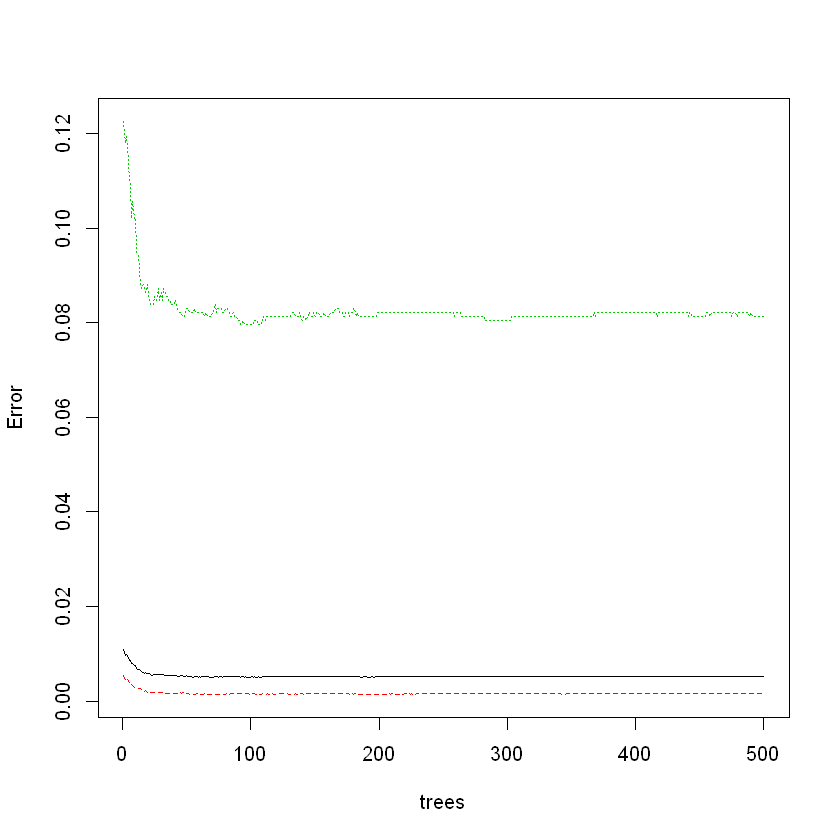

In [15]:
plot(random_eq1, main= "")

The graph shows that the error rate decreases with the increase in number of trees till about less than 100 trees. Then the error rate remains the same. A bunch of combinations were tried in the process of finding a prediction model with least OOB error. 

In [16]:
#best results
random_eq3 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=3,importance=TRUE,data=dataset)
random_eq3


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = 3,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.49%
Confusion matrix:
      0    1 class.error
0 24852   31  0.00124583
1    96 1084  0.08135593

In [17]:
set.seed(1600)
forest<- c(100, 250, 500)
npara<- c(3, 6, 8)
random_eq5 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[1], ntree=forest[1], importance=TRUE,data=dataset)

random_eq6 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[1],ntree=forest[2],importance=TRUE,data=dataset)

random_eq7 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[1],ntree=forest[3],importance=TRUE,data=dataset)

random_eq8 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[2],ntree=forest[1],importance=TRUE,data=dataset)

random_eq9 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[2],ntree=forest[2],importance=TRUE,data=dataset)

random_eq10 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[2],ntree=forest[3],importance=TRUE,data=dataset)

random_eq11 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[3],ntree=forest[1],importance=TRUE,data=dataset)

random_eq12 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[3],ntree=forest[2],importance=TRUE,data=dataset)

random_eq13 <- randomForest(as.factor(dead)~dvcat+weight+seatbelt+sex+ageOFocc+yearacc+yearVeh+abcat+occRole+deploy+injSeverity+frontal+airbag, mtry=npara[3],ntree=forest[3],importance=TRUE,data=dataset)

Out of all the models, the best OOB rating came with the model “random_eq9” with number of trees 250 and “mtry” value of 6. The OOB error rate is 0.49%.

In [18]:
random_eq5
random_eq6
random_eq7
random_eq8
random_eq9
random_eq10
random_eq11
random_eq12
random_eq13


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[1],      ntree = forest[1], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.5%
Confusion matrix:
      0    1 class.error
0 24852   31  0.00124583
1    99 1081  0.08389831


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[1],      ntree = forest[2], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.49%
Confusion matrix:
      0    1 class.error
0 24851   32 0.001286019
1    96 1084 0.081355932


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[1],      ntree = forest[3], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.49%
Confusion matrix:
      0    1 class.error
0 24850   33 0.001326207
1    96 1084 0.081355932


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[2],      ntree = forest[1], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 6

        OOB estimate of  error rate: 0.5%
Confusion matrix:
      0    1 class.error
0 24849   34 0.001366395
1    96 1084 0.081355932


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[2],      ntree = forest[2], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 6

        OOB estimate of  error rate: 0.49%
Confusion matrix:
      0    1 class.error
0 24850   33 0.001326207
1    96 1084 0.081355932


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[2],      ntree = forest[3], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 0.49%
Confusion matrix:
      0    1 class.error
0 24850   33 0.001326207
1    96 1084 0.081355932


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[3],      ntree = forest[1], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 8

        OOB estimate of  error rate: 0.5%
Confusion matrix:
      0    1 class.error
0 24849   34 0.001366395
1    96 1084 0.081355932


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[3],      ntree = forest[2], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 250
No. of variables tried at each split: 8

        OOB estimate of  error rate: 0.5%
Confusion matrix:
      0    1 class.error
0 24848   35 0.001406583
1    96 1084 0.081355932


Call:
 randomForest(formula = as.factor(dead) ~ dvcat + weight + seatbelt +      sex + ageOFocc + yearacc + yearVeh + abcat + occRole + deploy +      injSeverity + frontal + airbag, data = dataset, mtry = npara[3],      ntree = forest[3], importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 8

        OOB estimate of  error rate: 0.51%
Confusion matrix:
      0    1 class.error
0 24847   36 0.001446771
1    96 1084 0.081355932

In [19]:
importance(random_eq9)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
dvcat,0.4844796,30.4493274,25.2560405,84.695757
weight,-0.5443842,5.9622788,4.8950679,107.247471
seatbelt,-3.3876572,7.3961591,1.0704281,13.142185
sex,0.8021174,-0.1223788,0.6670998,7.909963
ageOFocc,8.1824938,-1.6836470,6.4161685,66.535835
yearacc,6.5883934,-0.1038826,5.5741339,22.651917
yearVeh,12.7246541,3.9657789,13.3935378,41.393088
abcat,7.7248377,-1.3052906,7.1192517,5.230626
occRole,1.4967473,0.8574473,1.6488738,6.712846
deploy,5.4910223,-0.3704413,4.8668428,4.738656


The variable importance plot is plot and variable importance chart shows the independent variables in sequence according to the magnitude of impact they make on the prediction accuracy. The variables are sorted on the bases of two factors which are “Mean Decrease in Accuracy” and “Mean Decrease in Gini”.

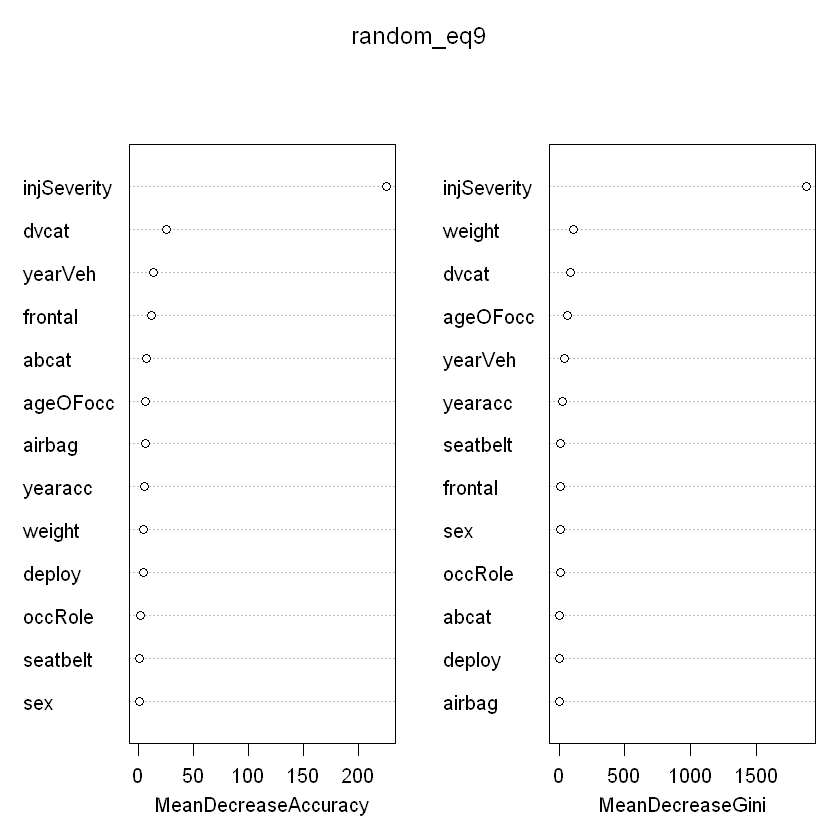

In [20]:
varImpPlot(random_eq9)

shows the top predicting values in descending order from the top to bottom with the best predicting variable as “injSeverity”. The order of the variable importance from the most important to the least important variable according to mean decrease in accuracy is “injSeverity”, “dvcat”, “yearVeh”, “frontal”, “abcat”, “ageOFocc”, “airbag”, “yearacc”, “weight”, “deploy”, “occRole”,  “seatbelt”, and “sex”. The importance of the variable according to the mean decrease in gini is “injSeverity”, “weight”, “dvcat”, “ageOFocc”, “yearVeh”, “yearacc”, “seatbelt”, “frontal”, “sex”, “occRole”, “abcat”, “deploy”, and “airbag”. 

In [21]:
(recall2<- 24850/(24850+96))
(precision2<- 24850/(24850+33))
(Accuracy2<- (24850+1084)/(24850+1084+96+33))

end_time <- Sys.time()

end_time - start_time

[1] 0.9961517

[1] 0.9986738

[1] 0.9950505

Time difference of 3.692991 mins

Conclusion- The confusion matrix shows that for model “random_eq9”, the TP is 24850 and the TN is 1084. The FP is 33 and the FN is 96. Thus 24850 values were predicted alive and were alive and 1084 people predicted dead turned out to be dead. However, 33 people were alive but were misclassified as dead and 96 people were dead but were predicted alive as an error. Thus the recall for the model is 99.6%. This shows that out of all the people that were predicted alive, 99.6% were actually alive and the rest were dead. The precision of 99.8% shows that out of all the alive people that were to be predicted, only 99.8% were predicted correctly. The accuracy of the model turned out to be 99.5%.
The Random forest model worked best for the prediction of the “dead” on the basis of the independent variables with an accuracy of 99.5% and misclassification rate of 0.05%.
Random forest model predicted more TP and TN values than that of the Logistic Regression model and thus the recall, precision, and accuracy significantly increased in the Random forest model.